In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_random_walk(num_steps, p_still):
    a = np.array(
        [
            (0, 0),
            (-1, -1),
            (-1, 0),
            (-1, 1),
            (0, -1),
            (0, 1),
            (1, -1),
            (1, 0),
            (1, 1),
        ],
        dtype=np.float64,
    )
    q_move = (1.0 - p_still) / 8.0
    p = [
        p_still,
        q_move,
        q_move,
        q_move,
        q_move,
        q_move,
        q_move,
        q_move,
        q_move,
    ]
    m = np.random.choice(9, size=num_steps, replace=True, p=p)
    cumsum = np.cumsum(a[m], axis=0)
    return cumsum

In [11]:
def get_random_walk_with_vector(num_steps: int, movement: tuple[int, int]) -> np.ndarray:
    a = np.array(
        [
            (-1, -1),
            (0, -1),
            (1, -1),
            (-1, 0),
            (0, 0),
            (1, 0),
            (-1, 1),
            (0, 1),
            (1, 1),
        ],
        dtype=np.float64,
    )
    prob_walk = 2
    p = np.full((3,3), 1/9)
    p[movement[0] + 1, movement[1] + 1] = prob_walk
    p /= p.sum()
    m = np.random.choice(9, size=num_steps, replace=True, p=p.flatten())
    # print(f"Movement (x, y): ({m % 3 - 1}, {m // 3 - 1})")
    cumsum = np.cumsum(a[m], axis=0)
    return cumsum

In [12]:
num_steps = 20
num_walks = 100000
walks = []
inc_x = 0
inc_y = 0
movement_vector = (0.5, 0.5)
for i in range(num_walks):
    if abs(inc_x) >= 1:
        inc_x = 0
    if abs(inc_y) >= 1:
        inc_y = 0

    inc_x += movement_vector[0]
    inc_y += movement_vector[1]

    # On row, column notation (y, x) -> (row, column)
    movement = (
        int(inc_x),
        int(inc_y),
    )
    walks.append(get_random_walk_with_vector(num_steps, movement))
walks = np.array(walks)

In [13]:
walks.shape  # walk, step, x/y

(100000, 20, 2)

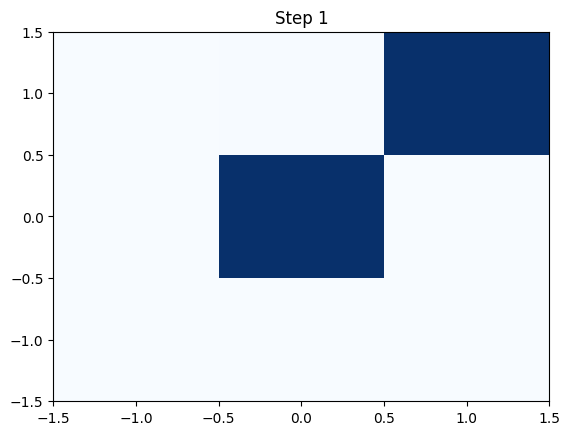

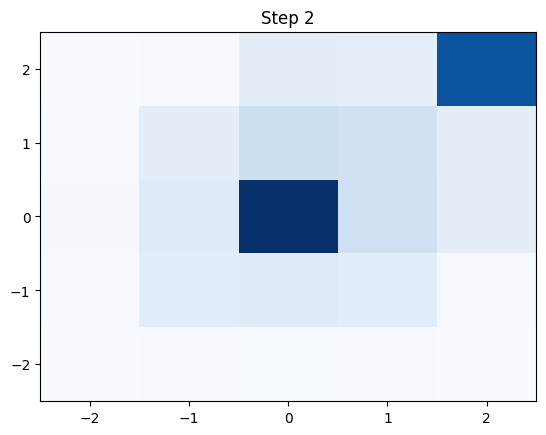

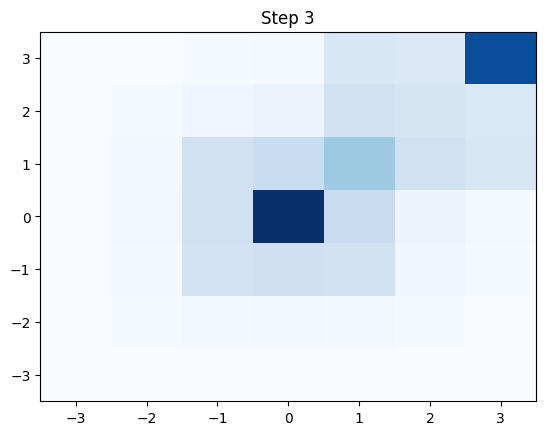

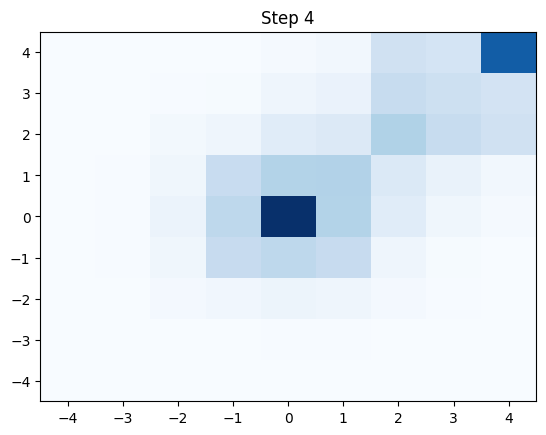

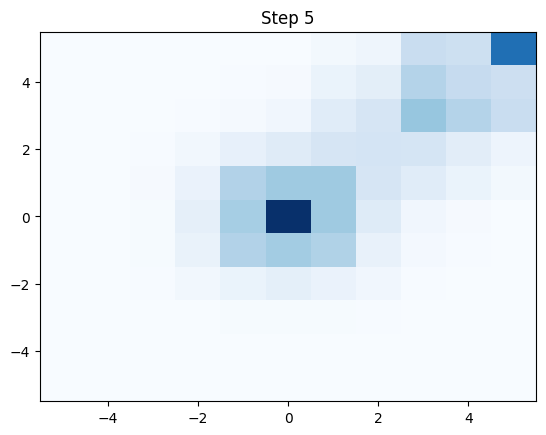

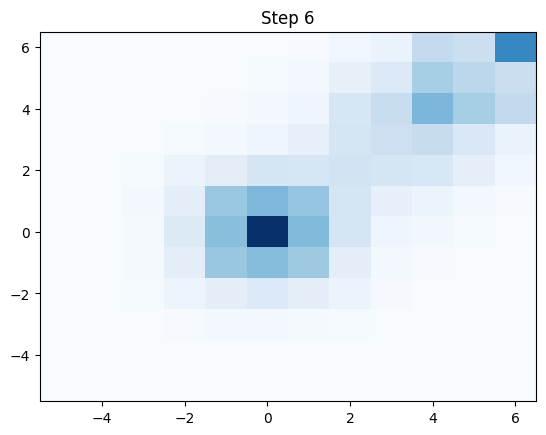

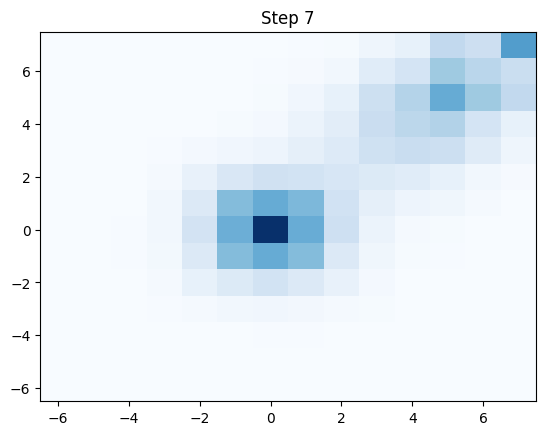

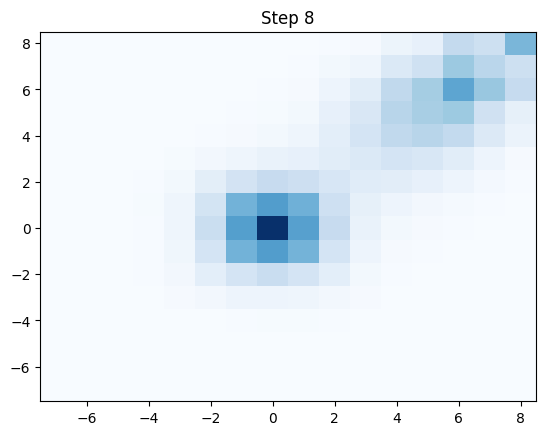

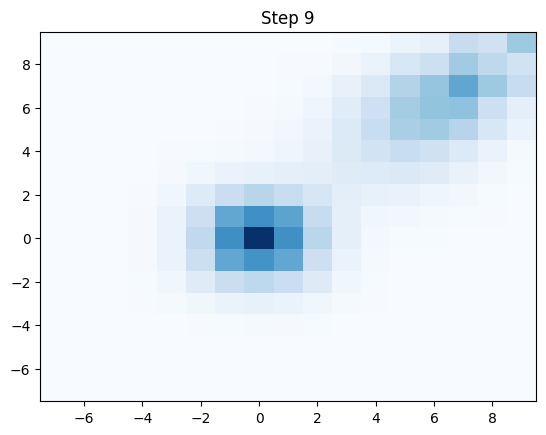

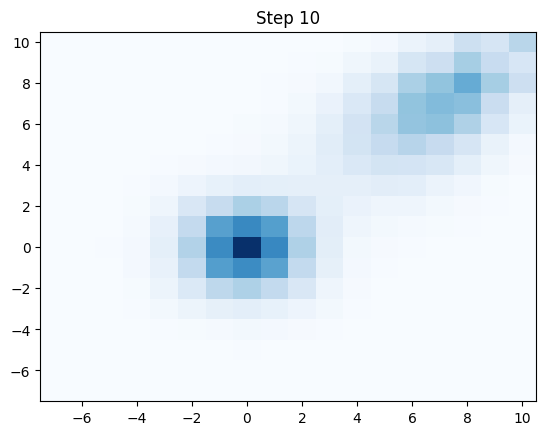

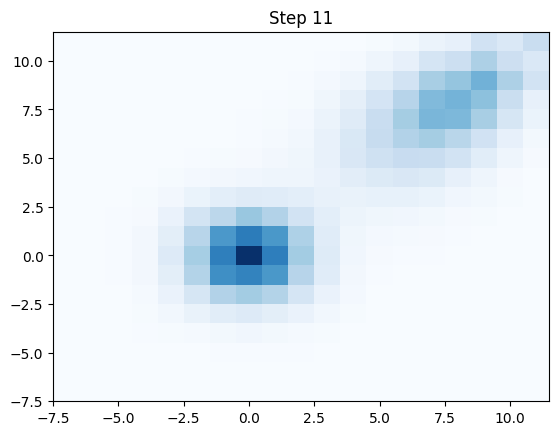

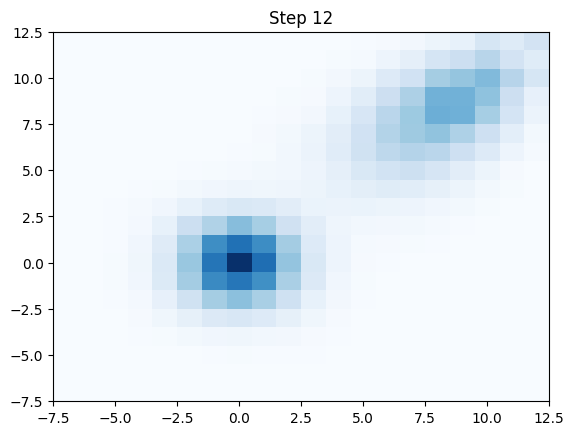

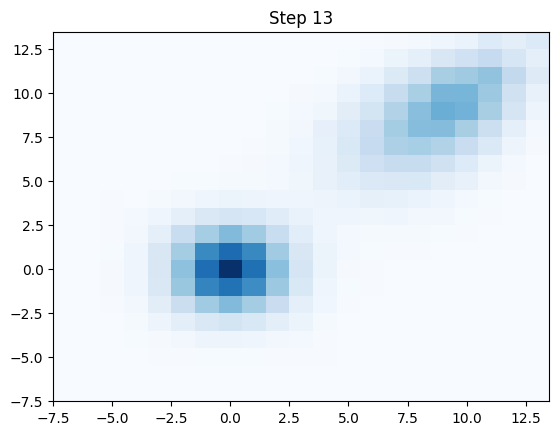

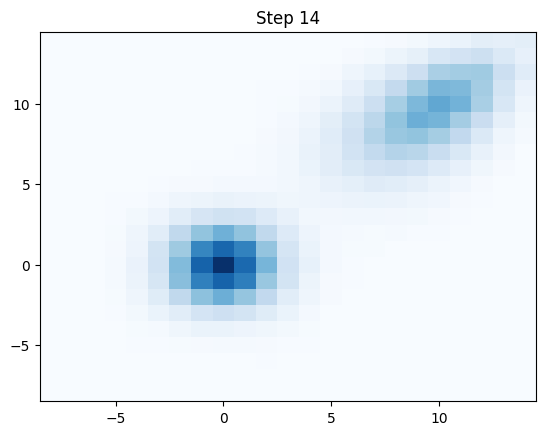

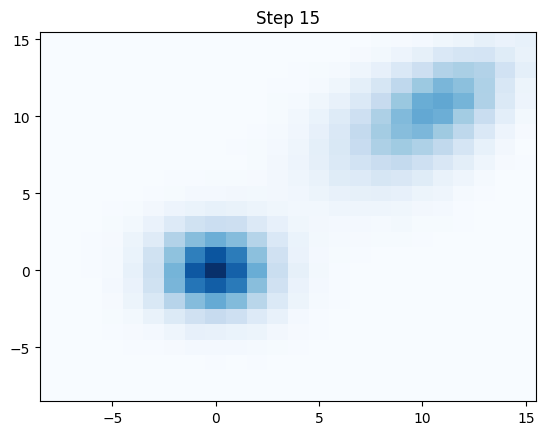

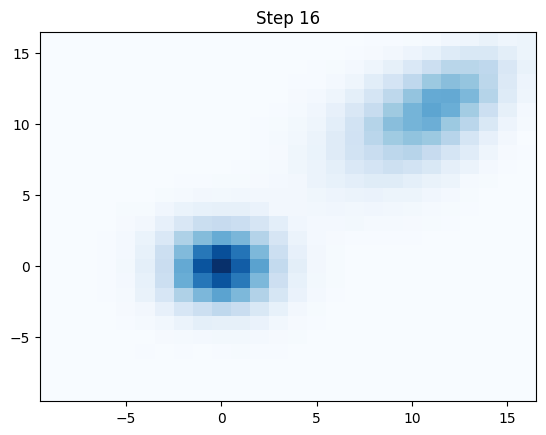

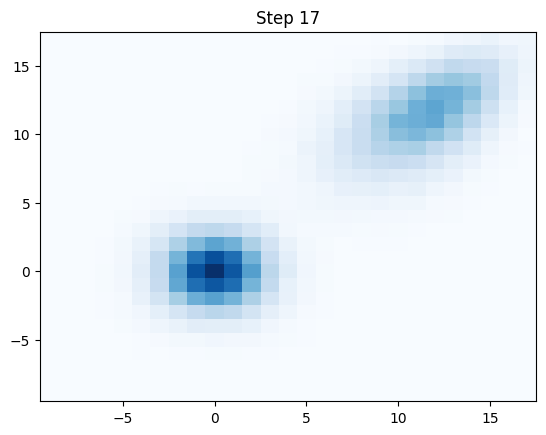

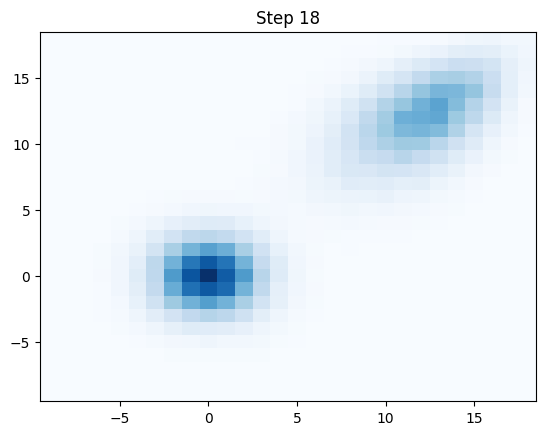

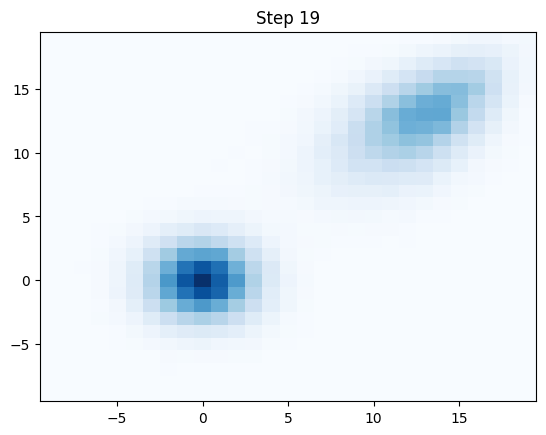

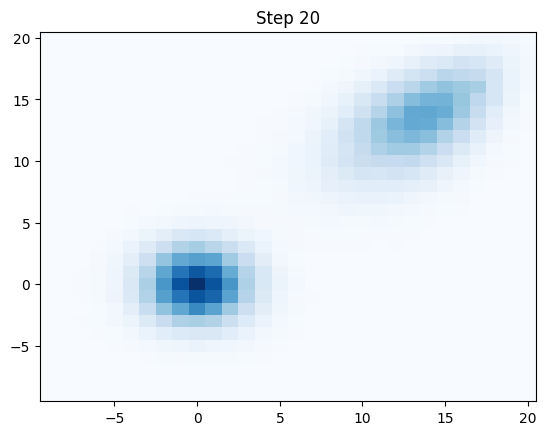

In [14]:
for i in range(num_steps):
    min_pos = np.min(walks[:, i, :])
    max_pos = np.max(walks[:, i, :])
    bins = np.arange(min_pos - 0.5, max_pos + 1.5, 1)
    plt.figure()
    plt.hist2d(walks[:, i, 0], walks[:, i, 1], bins=[bins, bins], cmap="Blues")
    plt.title(f"Step {i+1}")
    plt.show()